In [81]:
from PIL import Image, ImageDraw
import json
with open(f'./coco/annotations/panoptic_val2017.json', 'r') as file:
    COCO_panop_data = json.load(file)

image = "coco/val2017/000000022969.jpg"
img = Image.open(image)

def center_crop_image(img):
    ori_w, ori_h = img.size
    crop_res = min(ori_w, ori_h)
    left = (ori_w - crop_res) // 2
    top = (ori_h - crop_res) // 2
    right = left + crop_res
    bottom = top + crop_res
    center_cropped_image = img.crop((left, top, right, bottom))
    return center_cropped_image

def draw_bboxes(img, bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        x,y,w,h = bbox
        bbox_ = [(x,y), (x+w,y), (x+w,y+h), (x,y+h)]
        draw.polygon(bbox_, outline='red')
    return img

# draw_bboxes(img, bboxes)

[[350, 102, 72, 262], [4, 253, 152, 136]] 1.3653333333333333


/tmp/ipykernel_3170480/1461483877.py:8: DeprecationWarning: BICUBIC is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BICUBIC instead.
  center_cropped_image = center_cropped_image.resize((512,512), resample=Image.BICUBIC)


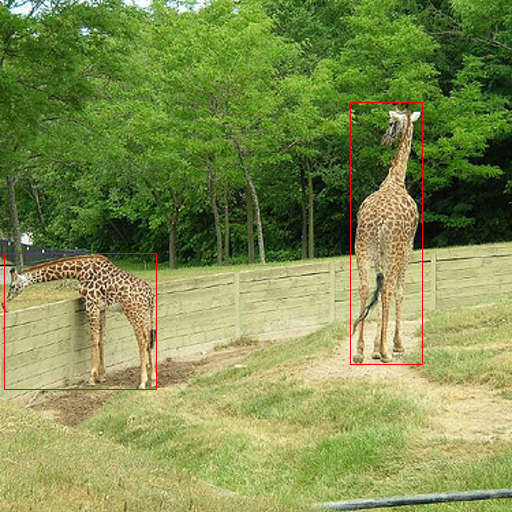

In [105]:
ori_w, ori_h = img.size
crop_res = min(ori_w, ori_h)
left = (ori_w - crop_res) // 2
top = (ori_h - crop_res) // 2
right = left + crop_res
bottom = top + crop_res
center_cropped_image = img.crop((left, top, right, bottom))
center_cropped_image = center_cropped_image.resize((512,512), resample=Image.BICUBIC)

scale = 512 / crop_res

new_bboxes = []
for bbox in bboxes:
    x,y,w,h = bbox
    x = x - left
    y = y - top
    x,y,w,h = int(x*scale), int(y*scale), int(w*scale), int(h*scale)
    new_bboxes.append([x,y,w,h])

print(new_bboxes, scale)
draw_bboxes(center_cropped_image, new_bboxes)


In [65]:
bboxes
[[319, 75, 53, 192],
 [65, 186, 112, 100],


[[319, 75, 53, 192], [65, 186, 112, 100]]

In [83]:
category_list = [11,13,16 

            ,16,17,18,19,20,21,22,24,25

            ,44,46,47,51

            ,53,55,56,58,59,60,61

            ,70,72,73,74,85,86]

for item in COCO_panop_data['annotations']:
    if item['file_name'] == '000000022969.png':
        it = item
        print(item['segments_info'])
bboxes = []
for i in it['segments_info']:
    if i['category_id'] in category_list:
        bboxes.append(i['bbox'])


[{'id': 7314606, 'category_id': 25, 'iscrowd': 0, 'bbox': [319, 75, 53, 192], 'area': 5256}, {'id': 6721189, 'category_id': 25, 'iscrowd': 0, 'bbox': [65, 186, 112, 100], 'area': 3924}, {'id': 2515524, 'category_id': 184, 'iscrowd': 0, 'bbox': [0, 0, 500, 213], 'area': 89574}, {'id': 8426124, 'category_id': 185, 'iscrowd': 0, 'bbox': [0, 177, 114, 38], 'area': 1642}, {'id': 11717322, 'category_id': 191, 'iscrowd': 0, 'bbox': [0, 164, 41, 35], 'area': 1234}, {'id': 7123888, 'category_id': 193, 'iscrowd': 0, 'bbox': [0, 192, 500, 183], 'area': 56728}, {'id': 8565438, 'category_id': 194, 'iscrowd': 0, 'bbox': [82, 225, 300, 88], 'area': 5751}]


In [29]:
bboxes

[[319, 75, 53, 192],
 [65, 186, 112, 100],
 [0, 0, 500, 213],
 [0, 177, 114, 38],
 [0, 164, 41, 35],
 [0, 192, 500, 183],
 [82, 225, 300, 88]]

In [5]:
import json
import os

ratio = "0.06_0.7"
with open(f"caption_{ratio}_smaller/train2017/changed_caption.json") as f:
    data = json.load(f)
with open(f"caption_{ratio}_smaller/val2017/changed_caption.json") as f:
    data2 = json.load(f)
data.update(data2)
print(len(data))
with open(f"caption_{ratio}_smaller/combined_changed_caption.json", "w") as f:
    json.dump(data, f)

59563


In [6]:
with open(f"modified_coco_btw_{ratio}/train2017/modified_data.json") as f:
    modified_data = json.load(f)
with open(f"modified_coco_btw_{ratio}/val2017/modified_data.json") as f:
    modified_data2 = json.load(f)

for item in modified_data:
    item["blip2_caption"] = data[item["score_obj_quries_bboxes"]]
for item in modified_data2:
    item["blip2_caption"] = data[item["score_obj_quries_bboxes"]]

with open(f"modified_coco_btw_{ratio}/train2017/modified_data_smaller.json", "w") as f:
    json.dump(modified_data, f)
with open(f"modified_coco_btw_{ratio}/val2017/modified_data_smaller.json", "w") as f:
    json.dump(modified_data2, f)
